
# Assignment 2
<p>Milton Palaguachi<br />CSC 30100 Scientific Programming<br />CCNY<br />Spring 2019</p>

<p>&nbsp;</p>

## Naive Summation and Compensated Summation
The calculation will be done for N = 10^6, 10^7, 10^8, and 10^9


![title](img/exact_value.png)




In [4]:
%matplotlib inline

In [5]:
#math libray import to use pi=3.1415....
import math
import time
import matplotlib.pyplot as plt

### Naive Summation Algorithm
<p>Receives an input n, where n the number of iteration through the loop<br />Note that &nbsp;<em>pi</em>&nbsp;is global variable <br />The function naive_sum() will return the summation of the naive computation</p>

In [6]:
def naive_sum(n):
    s = 0
    for i in range(0,n):
        s += pi
    return s

### Compensated Algorithm
<p>The same aprouch is done to the following function.<br />Receives an input n, where n the number of iteration through the loop<br />Note that&nbsp;<em>pi</em>&nbsp;is global variable<br />The function copensated_sum() will return the summation of the compensated computation</p>

In [7]:

def compensated_sum(n):
    s=0
    e=0
    for i in range(0,n):
        temp = s
        y = pi + e
        s = temp + y
        e = (temp - s) + y
    s+=e
    return s

## comp_time 
<ul>
<li>This function calculates the time each algorithm takes to do the computation</li>
<li>this function returns the computatial results and the time taken to do each compuation&nbsp;</li>
<li>x_c= rusult of compasated algorithm summation</li>
<li>x_n= result of naive algorithm sumamtion</li>
<li>elapsed_c= elapsed time for the compensa summation&nbsp;</li>
<li>elapsed_n = elapsed time for the naive summation</li>
</ul>

In [8]:
def comp_time(n):

    start_c = time.time() 
    x_c = compensated_sum(n)
    end_c = time.time() 
    elapsed_c = end_c - start_c

    start_n = time.time() 
    x_n = naive_sum(n)
    end_n= time.time() 
    elapsed_n= end_n- start_n

    return x_c, x_n, elapsed_c, elapsed_n


<h1>The main computation is done here</h1>
<p>&nbsp;</p>
<p>The summation will be perform for the values of N= 10^6, 10^7, 10^8, and 10^9. The exacta values is place in the array x_lit.</p>
<ul>
<li>Using a for loop, comp-time is called 4 times</li>
<li>Four lists are created here to store the values every time comp_time is called</li>
<li>In the naive list is the store the summation of N= 10^6, 10^7, 10^8, and 10^9.</li>
<li>In the compensated list is store the summation of N= 10^6, 10^7, 10^8, and 10^9.</li>
<li>In the c_time list is stored the time that is took to compute the compensated summation when N= 10^6, 10^7, 10^8, and 10^9 consecuently.</li>
<li>In the n_time list is stored the time that is took to compute the naive summation when N= 10^6, 10^7, 10^8, and 10^9 consecuently.</li>
</ul>

In [9]:




pi = math.pi
N= [1000000,10000000,100000000,1000000000]
x_list = [1.0e6*pi, 1.0e7*pi, 1.0e8*pi, 1.0e9*pi]

naive=[None]*4
compensated=[None]*4
c_times=[None]*4
n_times =[None]*4

for i in range(0, 4):
    compensated[i], naive[i], c_times[i], n_times[i]= comp_time(N[i])

In [10]:
print(naive)
print(compensated)
print(c_times)
print(n_times)


[3141592.6535849427, 31415926.543478474, 314159265.624272, 3141592632.494384]
[3141592.653589793, 31415926.535897933, 314159265.3589793, 3141592653.589793]
[0.12862610816955566, 1.2419452667236328, 12.592914342880249, 125.87607789039612]
[0.058773040771484375, 0.598341703414917, 5.856259822845459, 61.52693486213684]


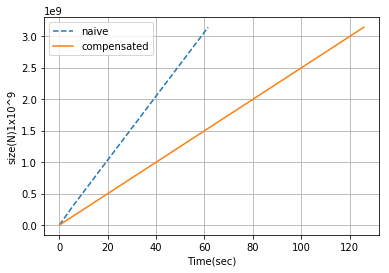

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_times,naive,'--',label='naive')
plt.plot(c_times,compensated,label='compensated')
plt.xlabel('Time(sec)')
plt.ylabel('size(N)1x10^9')
plt.grid()
plt.legend()
plt.show()
plt.savefig('summation_vs_time')

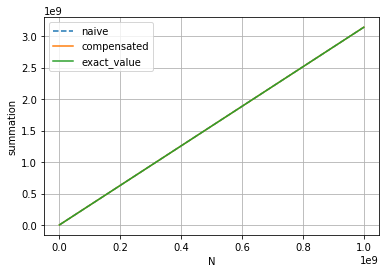

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure()
plt.plot(N,naive,'--',label='naive')
plt.plot(N,compensated,label='compensated')
plt.plot(N,x_list,label='exact_value')
plt.xlabel('N')
plt.ylabel('summation')
plt.grid()
plt.legend()
plt.show()
plt.savefig('summation_vs_time')

![title](img/exactvalue_vs_naive_compensated.png)

In [13]:
absolute_error_naive = [None]*4
relative_error_naive = [None]*4

absolute_error_compensated = [None]*4
relative_error_compensated = [None]*4

In [17]:
for i in range(0,4):
    
    absolute_error_naive[i] =abs(naive[i] - x_list[i])
    relative_error_naive[i] = abs(naive[i] - x_list[i])/x_list[i]
    absolute_error_compensated[i] =abs(compensated[i] - x_list[i])
    relative_error_compensated[i] = abs(compensated[i] - x_list[i])/x_list[i]

![title](img/error.png)

In [27]:
print(absolute_error_naive)
print(relative_error_naive)
print(absolute_error_compensated)
print(relative_error_compensated)

[4.850327968597412e-06, 0.0075805410742759705, 0.2652927041053772, 21.095409393310547]
[1.543907343638299e-12, 2.4129611665643346e-10, 8.444529044917268e-10, 6.714877362985149e-09]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


<h1>Error Table</h1>
<p>&nbsp;</p>


In [77]:
st= 'size(N)       |Naive abs()           | Naive relative          | Compensated abs() | Compensated relative '
print(st)
print('|'+str(N[0])+'      |'+str(absolute_error_naive[0])+' |'+str(relative_error_naive[0])+'    |'+str(absolute_error_compensated[0])+'                |'+str(relative_error_compensated[0])+'|')
print('|'+str(N[1])+'     |'+str(absolute_error_naive[1])+' |'+str(relative_error_naive[1])+'   |'+str(absolute_error_compensated[1])+'                |'+str(relative_error_compensated[1])+'|')
print('|'+str(N[2])+'    |'+str(absolute_error_naive[2])+'    |'+str(relative_error_naive[2])+'    |'+str(absolute_error_compensated[2])+'                |'+str(relative_error_compensated[2])+'|')
print('|'+str(N[3])+'   |'+str(absolute_error_naive[3])+'    |'+str(relative_error_naive[3])+'    |'+str(absolute_error_compensated[3])+'                |'+str(relative_error_compensated[3])+'|')

size(N)       |Naive abs()           | Naive relative          | Compensated abs() | Compensated relative 
|1000000      |4.850327968597412e-06 |1.543907343638299e-12    |0.0                |0.0|
|10000000     |0.0075805410742759705 |2.4129611665643346e-10   |0.0                |0.0|
|100000000    |0.2652927041053772    |8.444529044917268e-10    |0.0                |0.0|
|1000000000   |21.095409393310547    |6.714877362985149e-09    |0.0                |0.0|


## Conclution
<p>&nbsp;</p>
<p style="line-height: 1.457148; margin-top: 0pt; margin-bottom: 0pt;"><span style="font-size: 12pt; font-family: Arial; color: #000000; background-color: transparent; font-weight: 400; font-variant: normal; text-decoration: none; vertical-align: baseline; white-space: pre-wrap;">The result have shown that the compensated algorithm has the exact result as the exact value. However the compensated algorithm takes twice as much to compute the summation of pi to the N. To conclude one can say that if we value time and the N size is small one can use the naive algorithm summation keeping in mind that there some relative error and absolute error. Meanwhile when N &gt; 1x10^8 and we want accuracy the best algorithm is compensated algorithm because has the absolute error relative error equals to zero however there is a price to pay, time. If we loop close in graph Tive vs naive and compensated summation we observe that the &nbsp;compensated time takes twice as much as the naive summation.</span></p>
